In [26]:
import pandas as pd

totalRuntimeAverageDF = pd.read_excel('dataGen/empiricalData.xlsx', sheet_name='totalRuntimeAverage')
totalRuntimeAverageDF.head()

,configNo,mazeSize,totalCells,totalArrayAverage,totalAdjacencyMatrixAverage,totalAdjacencyListAverage
0,1,5x5,25,0.003,0.006,0.006
1,2,25x25,625,0.007,0.100,0.010
2,3,40x30,1200,0.010,0.260,0.020
3,4,30x40,1200,0.010,0.240,0.020
4,5,50x50,2500,0.030,1.000,0.050


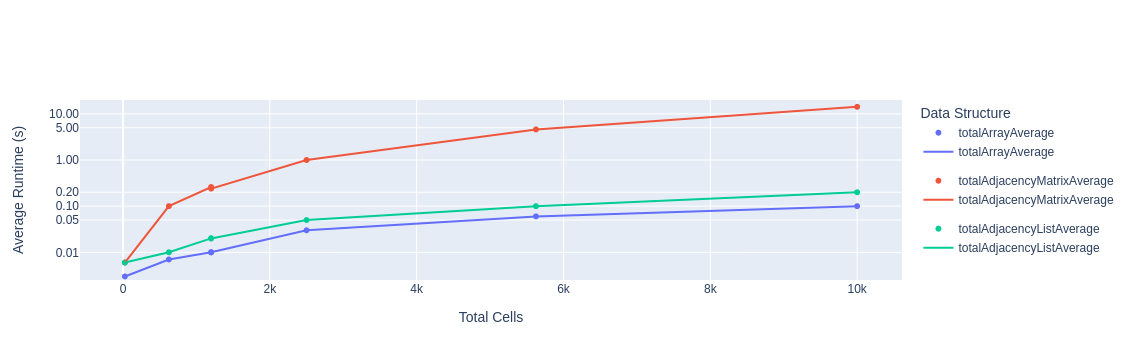

In [27]:
import plotly.graph_objects as go
import plotly.express as px

# Create the scatter plot
fig_scatter = px.scatter(
    data_frame=totalRuntimeAverageDF,
    x='totalCells',
    y=['totalArrayAverage', 'totalAdjacencyMatrixAverage', 'totalAdjacencyListAverage'],
    labels={'value': 'Average Runtime (s)', 'variable': 'Data Structure'},
    title='Total Cells vs. Average Runtime for Different Data Structures'
)

# Create the line plot
fig_line = px.line(
    data_frame=totalRuntimeAverageDF,
    x='totalCells',
    y=['totalArrayAverage', 'totalAdjacencyMatrixAverage', 'totalAdjacencyListAverage'],
    labels={'value': 'Average Runtime (s)', 'variable': 'Data Structure'},
)

# Combine the scatter and line plots
fig_combine = go.Figure(data=fig_scatter.data + fig_line.data)

# Update the layout with logarithmic y-axis
fig_combine.update_layout(
    xaxis_title='Total Cells',
    yaxis_title='Average Runtime (s)',
    legend_title='Data Structure',
    yaxis_type='log',
    yaxis_tickformat='.2f',  # Display tick labels with 2 decimal places
    yaxis_tickvals=[0, 0.01, 0.05, 0.1, 0.2, 1, 5, 10, 20],  # Custom tick values
    yaxis_range=[-2.6, 1.3],  # Set the y-axis range to accommodate the custom tick values
)

fig_combine.show()

In [53]:
import pandas as pd

arrayFunctionsDF = pd.read_excel('dataGen/empiricalData.xlsx', sheet_name='arrayFunctions')
arrayFunctionsDF.head()

,configNo,mazeSize,totalCells,__init__(),__init__() count,initCells(),initCells() count,addWall(),addWall() count,removeWall(),removeWall() count,hasWall(),hasWall() count,neighbours(),neighbours() count
0,1,5x5,25,0.00001,1,0.0001,1,0.000001,82,0.000001,28,0.000001,60,0.000001,43
1,2,25x25,625,0.00005,1,0.0020,1,0.000001,1402,0.000001,628,0.000001,1300,0.000001,1213
2,3,40x30,1200,0.00080,1,0.0040,1,0.000001,2612,0.000001,1203,0.000001,2470,0.000001,2313
3,4,30x40,1200,0.00010,1,0.0040,1,0.000001,2612,0.000001,1203,0.000001,2470,0.000001,2364
4,5,50x50,2500,0.00015,1,0.0070,1,0.000001,5302,0.000001,2503,0.000001,5100,0.000001,4981


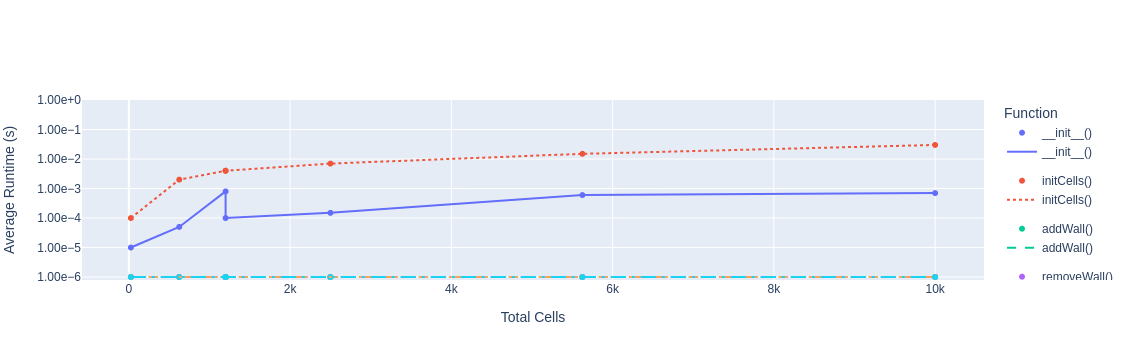

In [81]:
import plotly.graph_objects as go
import plotly.express as px

# Specify the desired functions
functions = ['__init__()', 'initCells()', 'addWall()', 'removeWall()', 'hasWall()', 'neighbours()']

# Define line styles and widths for each function
line_styles = ['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
line_widths = [2, 2, 2, 2, 2, 2]

# Create the scatter plot
fig_scatter = px.scatter(
    data_frame=arrayFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', '__init__()': '__init__()', 'initCells()': 'initCells()', 'addWall()': 'addWall()', 'removeWall()': 'removeWall()', 'hasWall()': 'hasWall()', 'neighbours()': 'neighbours()'},
    title='Total Cells vs. Average Runtime for Selected Array Functions',
    hover_data={'totalCells': ':.2f', 'value': ':.2e'}
)

# Create the line plot with different line styles and widths
fig_line = px.line(
    data_frame=arrayFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', '__init__()': '__init__()', 'initCells()': 'initCells()', 'addWall()': 'addWall()', 'removeWall()': 'removeWall()', 'hasWall()': 'hasWall()', 'neighbours()': 'neighbours()'},
    hover_data={'totalCells': ':.2f', 'value': ':.2e'}
)

# Combine the scatter and line plots
fig_combine = go.Figure(data=fig_scatter.data + fig_line.data)

# Update line styles and widths for each trace
for i, trace in enumerate(fig_combine.data[len(functions):]):
    trace.line.dash = line_styles[i]
    trace.line.width = line_widths[i]

# Update the layout with logarithmic y-axis and scientific notation
fig_combine.update_layout(
    xaxis_title='Total Cells',
    yaxis_title='Average Runtime (s)',
    legend_title='Function',
    yaxis_type='log',
    yaxis_tickformat='.2e',  # Display tick labels in scientific notation with 2 decimal places
    yaxis_tickvals=[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],  # Custom tick values
    yaxis_range=[-6.1, 0],  # Set the y-axis range to accommodate the custom tick values
    hoverlabel=dict(namelength=-1)  # Display full hover labels
)

fig_combine.show()

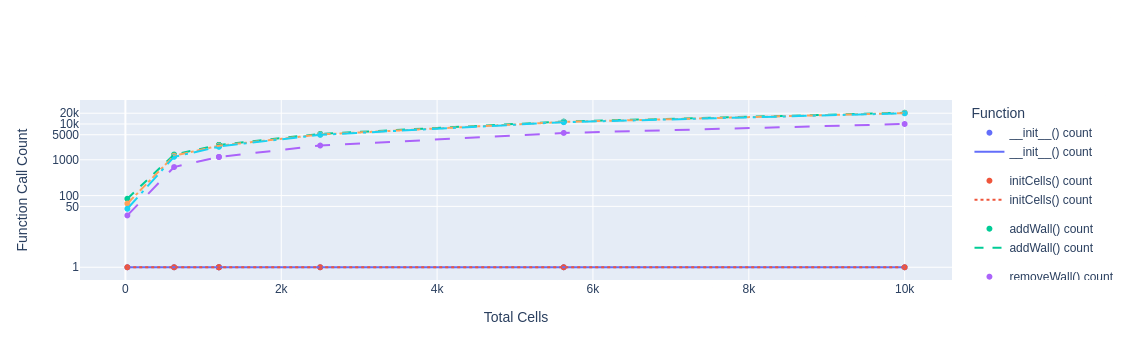

In [82]:
import plotly.graph_objects as go
import plotly.express as px

# Specify the desired functions
functions = ['__init__() count', 'initCells() count', 'addWall() count', 'removeWall() count', 'hasWall() count', 'neighbours() count']

# Define line styles and widths for each function
line_styles = ['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
line_widths = [2, 2, 2, 2, 2, 2]

# Create the scatter plot
fig_scatter = px.scatter(
    data_frame=arrayFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', '__init__() count': '__init__() count', 'initCells() count': 'initCells() count', 'addWall() count': 'addWall() count', 'removeWall() count': 'removeWall() count', 'hasWall() count': 'hasWall() count', 'neighbours() count': 'neighbours() count'},
    title='Total Cells vs. Function Call Count',
)

# Create the line plot with different line styles and widths
fig_line = px.line(
    data_frame=arrayFunctionsDF,
    x='totalCells',
    y=functions,
    labels={'totalCells': 'Total Cells', '__init__() count': '__init__() count', 'initCells() count': 'initCells() count', 'addWall() count': 'addWall() count', 'removeWall() count': 'removeWall() count', 'hasWall() count': 'hasWall() count', 'neighbours() count': 'neighbours() count'},
)

# Combine the scatter and line plots
fig_combine = go.Figure(data=fig_scatter.data + fig_line.data)

# Update line styles and widths for each trace
for i, trace in enumerate(fig_combine.data[len(functions):]):
    trace.line.dash = line_styles[i]
    trace.line.width = line_widths[i]

# Update the layout with logarithmic y-axis and scientific notation
fig_combine.update_layout(
    xaxis_title='Total Cells',
    yaxis_title='Function Call Count',
    legend_title='Function',
    yaxis_type='log',
    yaxis_tickvals=[0, 1, 50, 100, 1000, 5000, 10000, 20000],  # Custom tick values
    hoverlabel=dict(namelength=-1)  # Display full hover labels
)

fig_combine.show()

In [84]:
import pandas as pd

adjMatFunctionsDF = pd.read_excel('dataGen/empiricalData.xlsx', sheet_name='adjMatFunctions')
data.head()

,configNo,mazeSize,totalCells,__init__(),__init__() count,addVertex(),addVertex() count,addVertices(),addVertices() count,addEdge(),...,removeEdge(),removeEdge() count,hasVertex(),hasVertex() count,hasEdge(),hasEdge() count,getWallStatus(),getWallStatus() count,neighbours(),neighbours() count
0,1,5x5,25,0.000000,1,0.000005,45,0.00005,5,0.000002,...,NaN,0,NaN,0,0.000001,28,0.000003,60,0.000002,42
1,2,25x25,625,0.000001,1,0.000070,725,0.01000,5,0.000002,...,NaN,0,NaN,0,0.000001,628,0.000003,1300,0.000016,1203
2,3,40x30,1200,0.000001,1,0.000130,1340,0.04000,5,0.000002,...,NaN,0,NaN,0,0.000001,1203,0.000003,2470,0.000032,2375
3,4,30x40,1200,0.000001,1,0.000130,1340,0.04000,5,0.000002,...,NaN,0,NaN,0,0.000001,1203,0.000003,2470,0.000032,2375
4,5,50x50,2500,0.000001,1,0.000300,2700,0.14000,5,0.000002,...,NaN,0,NaN,0,0.000001,2503,0.000003,5100,0.000065,4962


In [85]:
import pandas as pd

adjListFunctionsDF = pd.read_excel('dataGen/empiricalData.xlsx', sheet_name='adjListFunctions')
adjListFunctionsDF.head()

,configNo,mazeSize,totalCells,__init__(),__init__() count,addVertex(),addVertex() count,addVertices(),addVertices() count,addEdge(),...,removeEdge(),removeEdge() count,hasVertex(),hasVertex() count,hasEdge(),hasEdge() count,getWallStatus(),getWallStatus() count,neighbours(),neighbours() count
0,1,5x5,25,0,1,0.000001,45,0.00001,5,0.000002,...,NaN,0,NaN,0,0.000002,28,0.000003,60,0.000001,30
1,2,25x25,625,0,1,0.000001,725,0.00014,5,0.000002,...,NaN,0,NaN,0,0.000002,628,0.000003,1300,0.000001,1213
2,3,40x30,1200,0,1,0.000001,1340,0.00033,5,0.000002,...,NaN,0,NaN,0,0.000002,1203,0.000003,2470,0.000001,2374
3,4,30x40,1200,0,1,0.000001,1340,0.00030,5,0.000002,...,NaN,0,NaN,0,0.000002,1203,0.000003,2470,0.000001,2386
4,5,50x50,2500,0,1,0.000001,2700,0.00050,5,0.000002,...,NaN,0,NaN,0,0.000002,2503,0.000003,5100,0.000001,4988


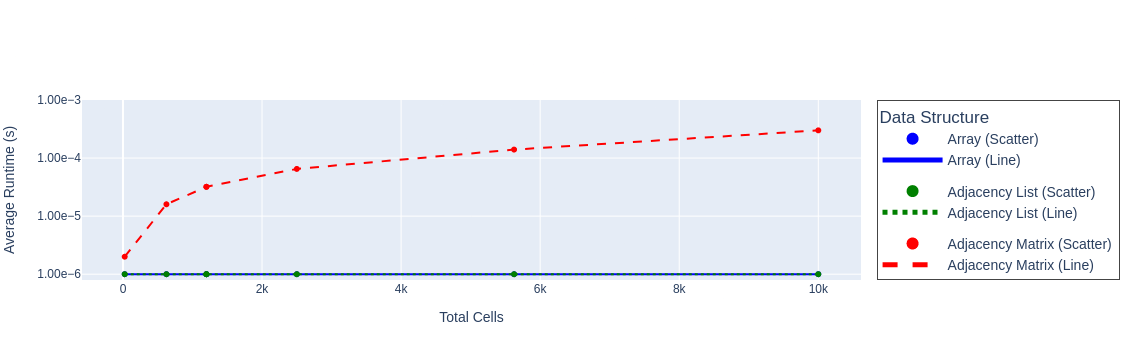

In [97]:
import plotly.graph_objects as go

# Create the scatter plot for Array
array_scatter = go.Scatter(
    x=arrayFunctionsDF['totalCells'],
    y=arrayFunctionsDF['neighbours()'],
    mode='markers',
    marker=dict(color='blue'),
    legendgroup='Array',
    name='Array (Scatter)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Create the line plot for Array
array_line = go.Scatter(
    x=arrayFunctionsDF['totalCells'],
    y=arrayFunctionsDF['neighbours()'],
    mode='lines',
    line=dict(color='blue', dash='solid'),
    legendgroup='Array',
    name='Array (Line)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Create the scatter plot for Adjacency List
adjlist_scatter = go.Scatter(
    x=adjListFunctionsDF['totalCells'],
    y=adjListFunctionsDF['neighbours()'],
    mode='markers',
    marker=dict(color='green'),
    legendgroup='Adjacency List',
    name='Adjacency List (Scatter)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Create the line plot for Adjacency List
adjlist_line = go.Scatter(
    x=adjListFunctionsDF['totalCells'],
    y=adjListFunctionsDF['neighbours()'],
    mode='lines',
    line=dict(color='green', dash='dot'),
    legendgroup='Adjacency List',
    name='Adjacency List (Line)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Create the scatter plot for Adjacency Matrix
adjmat_scatter = go.Scatter(
    x=adjMatFunctionsDF['totalCells'],
    y=adjMatFunctionsDF['neighbours()'],
    mode='markers',
    marker=dict(color='red'),
    legendgroup='Adjacency Matrix',
    name='Adjacency Matrix (Scatter)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Create the line plot for Adjacency Matrix
adjmat_line = go.Scatter(
    x=adjMatFunctionsDF['totalCells'],
    y=adjMatFunctionsDF['neighbours()'],
    mode='lines',
    line=dict(color='red', dash='dash'),
    legendgroup='Adjacency Matrix',
    name='Adjacency Matrix (Line)',
    hovertemplate='Total Cells: %{x}<br>Average Runtime (s): %{y:.2e}'
)

# Combine the scatter and line plots for all data structures
fig_combine = go.Figure(data=[array_scatter, array_line, adjlist_scatter, adjlist_line, adjmat_scatter, adjmat_line])

# Update the layout with logarithmic y-axis, scientific notation, and larger legend
fig_combine.update_layout(
    xaxis_title='Total Cells',
    yaxis_title='Average Runtime (s)',
    legend_title='Data Structure',
    yaxis_type='log',
    yaxis_tickformat='.2e',  # Display tick labels in scientific notation with 2 decimal places
    yaxis_tickvals=[1e-7, 1e-6, 1e-5, 1e-4, 1e-3],  # Custom tick values
    yaxis_range=[-6.1, -3],  # Set the y-axis range to accommodate the custom tick values
    legend=dict(
        font=dict(size=14),  # Increase the font size of the legend
        itemsizing='constant',  # Keep the legend item sizes constant
        itemwidth=60,  # Set a wider width for the legend items
        itemclick='toggleothers',  # Allow clicking on legend items to toggle visibility
        borderwidth=1  # Add a border around the legend
    )
)

fig_combine.show()